In [2]:
import sys
import uproot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import csv
import io
import matplotlib.colors as colors
from scipy.optimize import curve_fit
#from pynverse import inversefunc
from scipy.stats import pearsonr
#from lmfit import Parameters, fit_report, minimize
import astropy
from astropy import stats

In [3]:
npath = '/home/lane/notebook/solar/'
cpath = '/Users/Clara Escanuela/OneDrive/Escritorio/MPhys_project/jupyter scripts/'

genpath = cpath # general path

def root_input(path, filename):
    rTree = uproot.open(path + filename)
    
    rTree_event = rTree['mst']
    Ex = np.array(rTree_event['Ex'])
    Ev = np.array(rTree_event['Ev'])
    KEl = np.array(rTree_event['KEl'])
    pdgp = np.array(rTree_event['pdgp'])
    Ep = np.array(rTree_event['Ep'])
    
    return rTree, rTree_event, Ex, Ev, KEl, pdgp, Ep

filename = '8BCCday_MARLEYoutput.root'

rTree, rTree_event, Ex, Ev, KEl, pdgp, Ep = root_input(genpath, filename)

In [4]:
def optim_bins(mult_arry):
    
    #import astropy
    #from astropy import stats
    
    width_arry = np.array([])
    
    for arry in mult_arry: 
        width_temp = astropy.stats.freedman_bin_width(arry, return_bins=False)
        width_arry = np.append(width_arry, width_temp)
    
    energy_res = np.max(width_arry)
    print(energy_res)
    flat_arry = np.concatenate(mult_arry, axis=0)
    
    return int(round((np.max(flat_arry) - np.min(flat_arry)) / energy_res, 0))

print(rTree)
print(rTree_event)
print(Ev)
print(Ex)
print(KEl)

<ReadOnlyDirectory '/' at 0x0110de325670>
<TTree 'mst' (31 branches) at 0x0110de334970>
[ 9.7144914  10.50874477 11.53124217 ... 11.12674186  9.31509936
 13.2469869 ]
[2.28987 2.28987 4.3837  ... 4.3837  2.73036 2.28987]
[5.91750959 6.71218858 5.64022611 ... 5.23751155 5.07908822 9.44625321]


0.09022039974058921


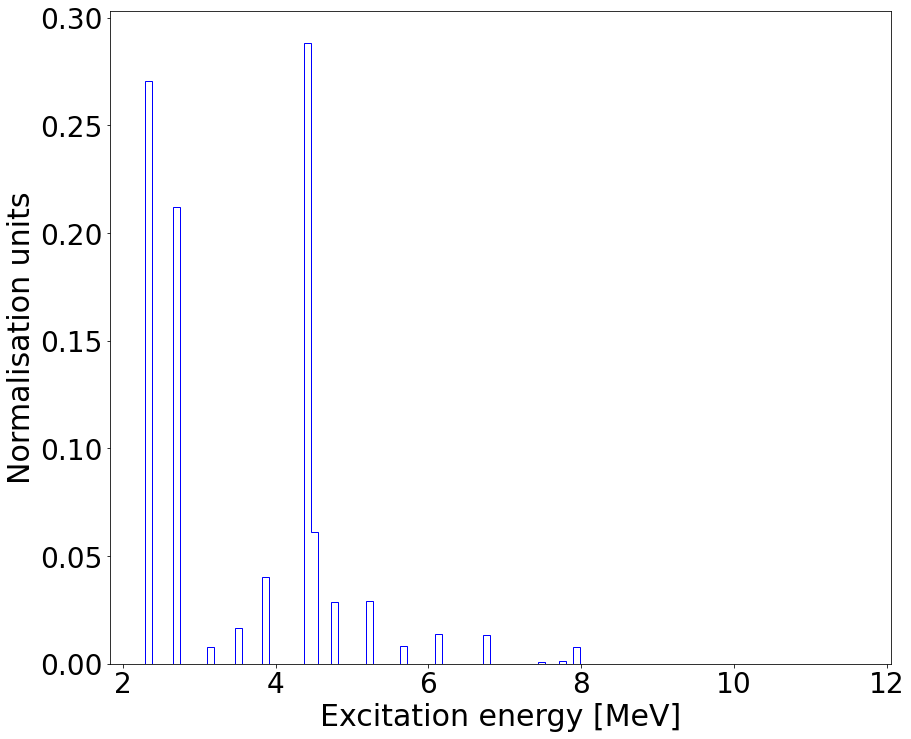

In [5]:
# spectrum of excitations

def hist_weights(rates, data):
    weights = []
    i = 0

    for event in data:
        weight = (rates[i]*np.ones_like(event))/len(event) #fraction = expected events / num of events generated
        weights.append(weight)
        i += 1
    
    return weights

plt.figure(figsize=(14,12))

data = [Ex]
rates = [1]

#num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, weights=hist_weights(rates,data), histtype='step', color='blue', bins=optim_bins(data), alpha=1)

plt.xlabel('Excitation energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

28846


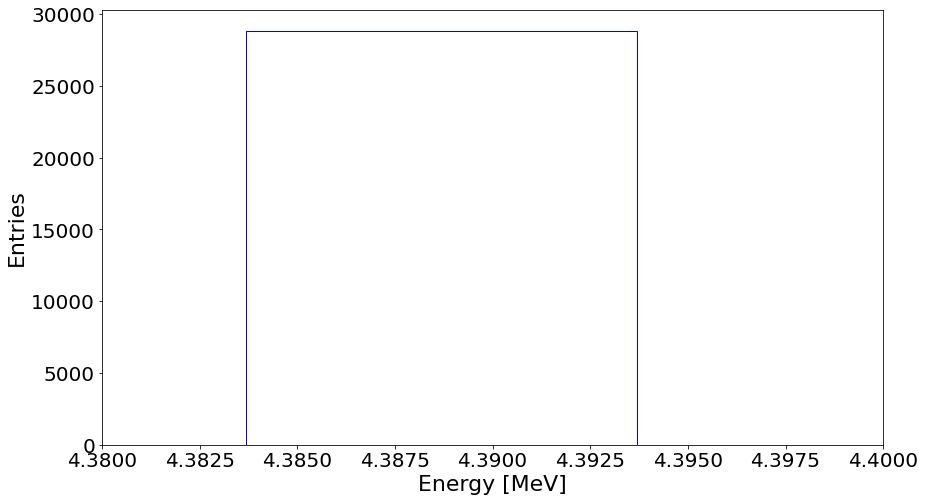

0.28846


In [6]:
# spectrum of excitations

plt.figure(figsize=(14,8))

data = [Ex[(Ex > 4)&(Ex < 4.5)]]

print(len(data[0]))

#num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', color='blue', bins=100, alpha=1)

plt.xlabel('Energy [MeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel('Entries',fontsize=22)
plt.yticks(fontsize=20)
#plt.yscale('log')
plt.xlim(4.38, 4.4)

plt.show()

sen_frac = len(data[0])/len(Ex)
print(sen_frac)

0.15539790852711866


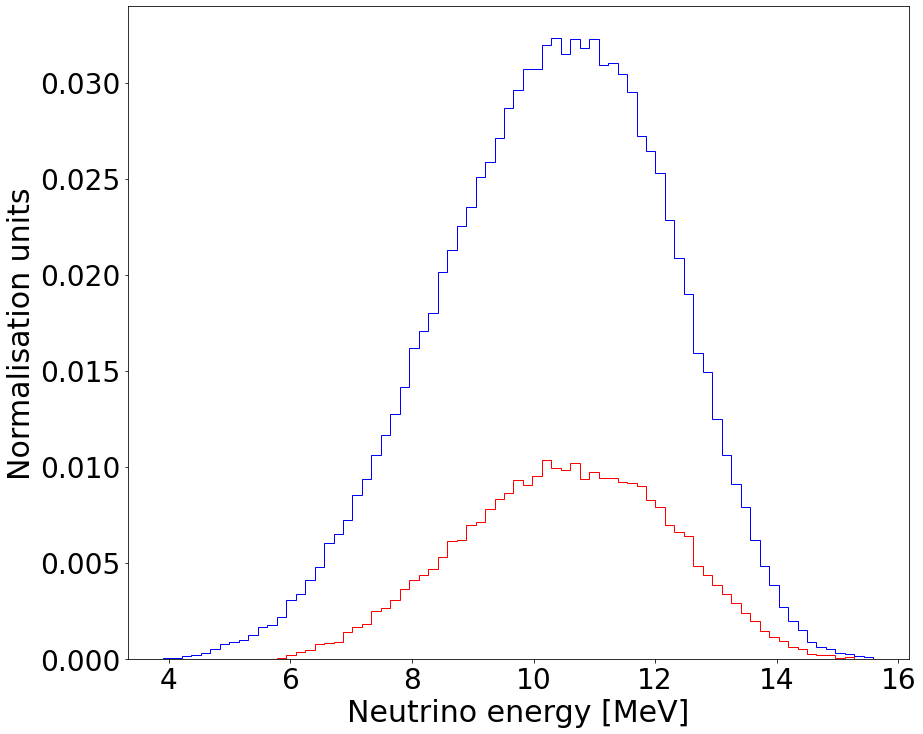

In [7]:
# spectrum of incoming neutrino

plt.figure(figsize=(14,12))

data = [Ev[(Ex > 4)&(Ex < 4.5)], Ev]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', color=['red','blue'], weights=hist_weights(rates,data), bins=num_bins, alpha=1)

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.15532180154526112


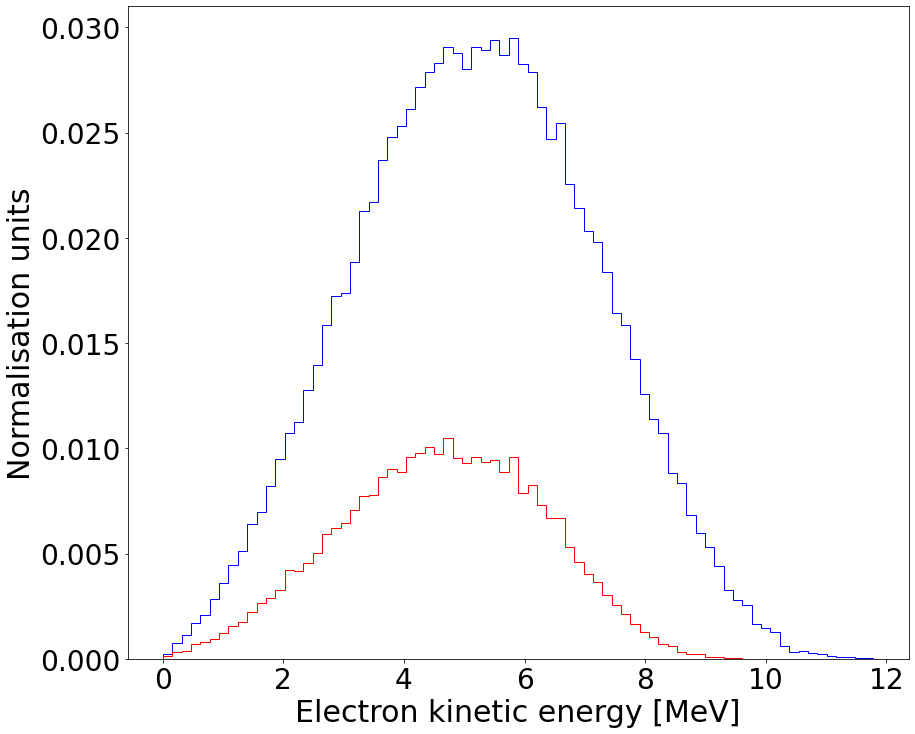

In [8]:
# spectrum of incoming neutrino

plt.figure(figsize=(14,12))

data = [KEl[(Ex > 4)&(Ex < 4.5)], KEl]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['red','blue'], bins=num_bins, alpha=1)

plt.xlabel('Electron kinetic energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.15532180154526112
62


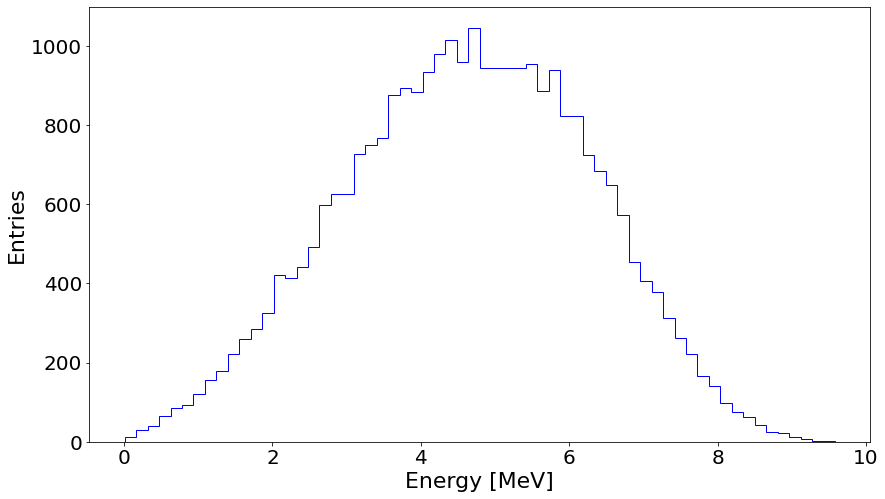

In [9]:
# kinetic energy spectrum of ejectile electron

plt.figure(figsize=(14,8))

data = [KEl[(Ex > 4)&(Ex < 4.5)]]

num_bins = optim_bins(data)
print(num_bins)
n, bins, patches = plt.hist(data, histtype='step', color='blue', bins=num_bins, alpha=1)

plt.xlabel('Energy [MeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel('Entries',fontsize=22)
plt.yticks(fontsize=20)
#plt.yscale('log')

plt.show()

Input these in to MARLEY config files, under neutrino source spec as type histogram...
E_bin_lefts: [7.87463283e-03 1.48653477e-01 2.89432321e-01 4.30211164e-01
 5.70990008e-01 7.11768852e-01 8.52547696e-01 9.93326540e-01
 1.13410538e+00 1.27488423e+00 1.41566307e+00 1.55644192e+00
 1.69722076e+00 1.83799960e+00 1.97877845e+00 2.11955729e+00
 2.26033613e+00 2.40111498e+00 2.54189382e+00 2.68267267e+00
 2.82345151e+00 2.96423035e+00 3.10500920e+00 3.24578804e+00
 3.38656689e+00 3.52734573e+00 3.66812457e+00 3.80890342e+00
 3.94968226e+00 4.09046111e+00 4.23123995e+00 4.37201879e+00
 4.51279764e+00 4.65357648e+00 4.79435532e+00 4.93513417e+00
 5.07591301e+00 5.21669186e+00 5.35747070e+00 5.49824954e+00
 5.63902839e+00 5.77980723e+00 5.92058608e+00 6.06136492e+00
 6.20214376e+00 6.34292261e+00 6.48370145e+00 6.62448030e+00
 6.76525914e+00 6.90603798e+00 7.04681683e+00 7.18759567e+00
 7.32837451e+00 7.46915336e+00 7.60993220e+00 7.75071105e+00
 7.89148989e+00 8.03226873e+00 8.17304758e+00 

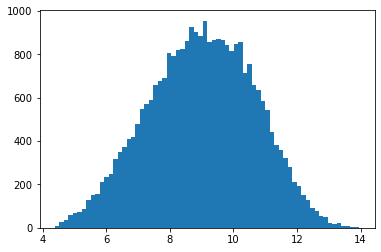

In [11]:
data = KEl[(Ex > 4)&(Ex < 4.5)]
output = np.histogram(data, bins=68)

plt.hist(data+4.38, bins=68)

print('Input these in to MARLEY config files, under neutrino source spec as type histogram...')
print('E_bin_lefts:', (output[1][0:len(output[0])]))
print('weights:', (output[0]))
print('Emax:', output[1][len(output[0])])

In [17]:
with open('8BCC_elecKE.txt', 'w') as f:
    
    for i in np.arange(0, len(output[0])):
        f.write("{} {}\n".format(output[1][i], output[0][i])) 
        #f.write(output[1][i] + ' ' + output[0][i])

In [18]:
print(pdgp)
print(np.concatenate(Ep))

[array([22, 22, 22]) array([22, 22, 22]) array([22, 22, 22, 22]) ...
 array([22, 22, 22, 22, 22]) array([22, 22, 22, 22]) array([22, 22, 22])]
[1.49020819 0.77051108 0.02983036 ... 0.64596872 1.61345402 0.0298383 ]


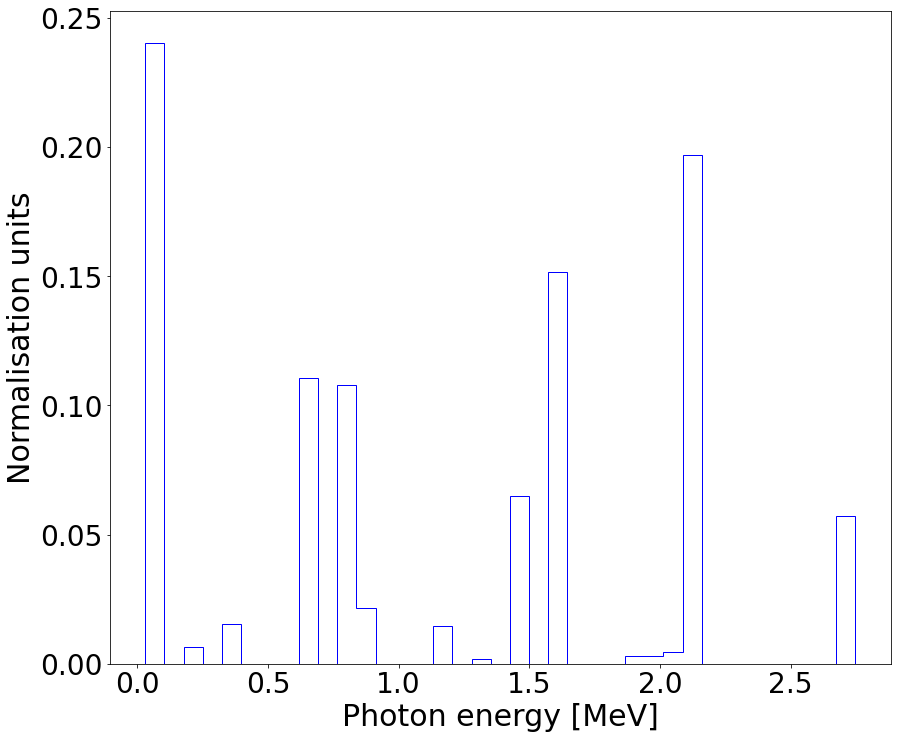

In [19]:
plt.figure(figsize=(14,12))

data = np.array(np.concatenate(Ep[(Ex > 4)&(Ex < 4.5)]))

num_bins = int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=num_bins, alpha=1)

plt.xlabel('Photon energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

In [20]:
data = np.concatenate([Ep[(Ex > 4)&(Ex < 4.5)]])

output = np.array([])
len_array = np.array([])
for array in data:
    output = np.append(output, np.mean(array))
    len_array = np.append(len_array, len(array))

print(output)
print(np.mean(output))
print(np.mean(len_array))


[1.09582959 1.09584625 1.09570167 ... 1.46128955 1.09562814 0.87684037]
1.19815687377777
3.8517298758926715


1.7919631507514924e-05
100


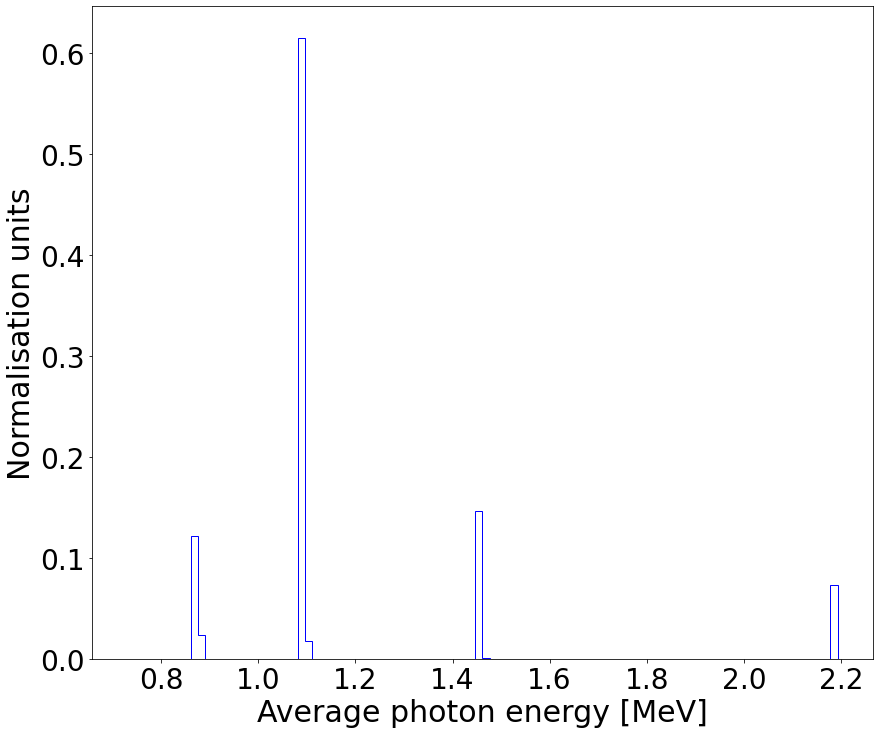

In [21]:
plt.figure(figsize=(14,12))

data = output
print(astropy.stats.freedman_bin_width(data, return_bins=False))

num_bins = 100 #int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))
print(num_bins)

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=num_bins, alpha=1)

plt.xlabel('Average photon energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

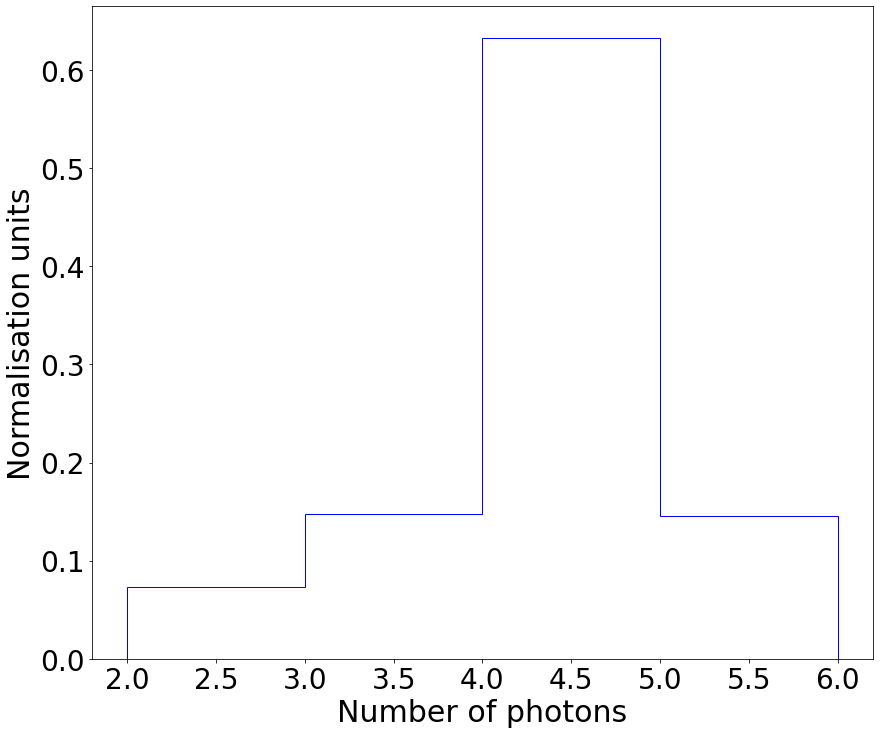

In [22]:
plt.figure(figsize=(14,12))

data = len_array

#num_bins = int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=int(4/1), alpha=1, range=[2,6])

plt.xlabel('Number of photons',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

[array([1.49020819, 0.77051108, 0.02983036])
 array([1.48925623, 0.7705575 , 0.02983034])
 array([2.09311796, 0.64642526, 1.61394995, 0.02982521]) ...
 array([2.09416578, 0.33077378, 1.15899955, 0.77043173, 0.02983102])
 array([1.08663847, 0.84339307, 0.77016271, 0.02982467])
 array([0.64596872, 1.61345402, 0.0298383 ])]
[array([22, 22, 22]) array([22, 22, 22]) array([22, 22, 22, 22]) ...
 array([22, 22, 22, 22, 22]) array([22, 22, 22, 22]) array([22, 22, 22])]
60289


<Figure size 1008x864 with 0 Axes>

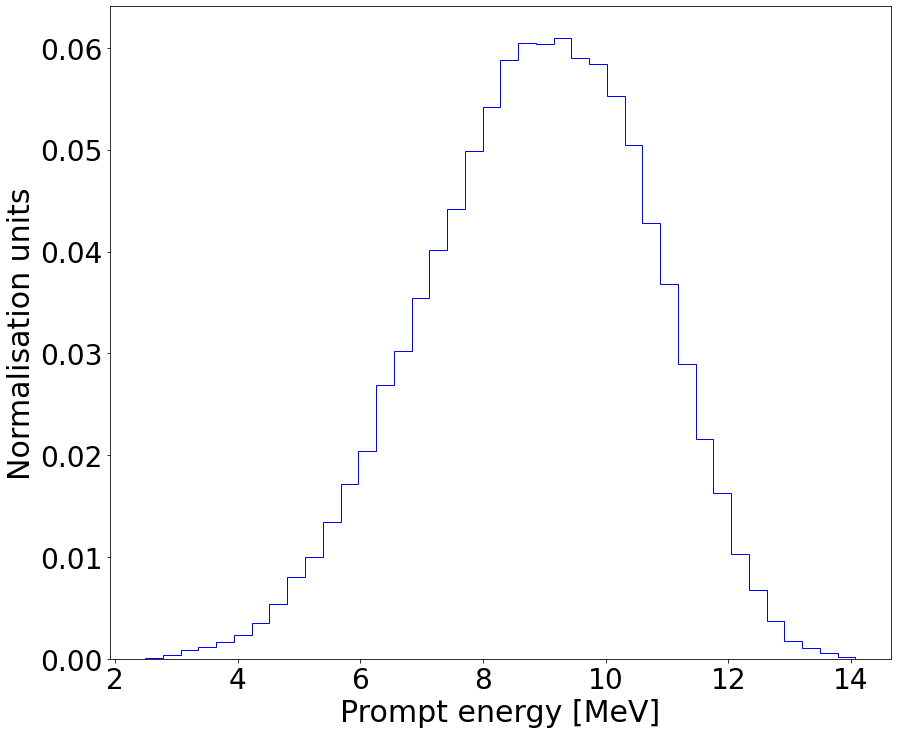

In [52]:
plt.figure(figsize=(14,12))

data = np.concatenate([Ep])
print(data)
print(pdgp)

#if any(mintrshold < x <= maxtreshold for x in a): print('True') 

#goodItems = data
#goodItems[(a<1.616) & (a>1.6)] 

#if goodItems.any(): 
#   print("there s an item within range")

output = np.array([])
len_array = np.array([])
output2 = np.array([])
KEl_output = np.array([])
KEl_output2 = np.array([])
Ev_output = np.array([])
Ev_output2 = np.array([])
prompt_output = np.array([])
prompt_output2 = np.array([])
i = 0
for array in data:
    if any(1.6 < x < 1.616 for x in array):
        if any(x > 22 for x in pdgp[i]):
            pass
        else:
            KEl_output = np.append(KEl_output, KEl[i])
            Ev_output = np.append(Ev_output, Ev[i])
            prompt_output = np.append(prompt_output, KEl[i] + (np.sum(array)-1.614-0.03))
            #output2 = np.append(output2, element)
            #output = np.append(output, np.sum(array)-element)
            len_array = np.append(len_array, len(array))
    else:
        if any(x > 22 for x in pdgp[i]):
            pass
        else:
            prompt_output2 = np.append(prompt_output2, KEl[i] + (np.sum(array)))
            KEl_output2 = np.append(KEl_output2, KEl[i])
            Ev_output2 = np.append(Ev_output2, Ev[i])
    i += 1


print(len(prompt_output2))




plt.figure(figsize=(14,12))

data = [prompt_output2]
rates = [1]

num_bins = 40  #optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('Prompt energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()


with open('B8_CCnodexc_spectra_night.txt', 'w') as f:
    
    for (a, b) in zip(bins[0:num_bins], n):
        
        f.write((str(a) + ' ' + str(b)))
        f.write('\n')

0.157346174967943


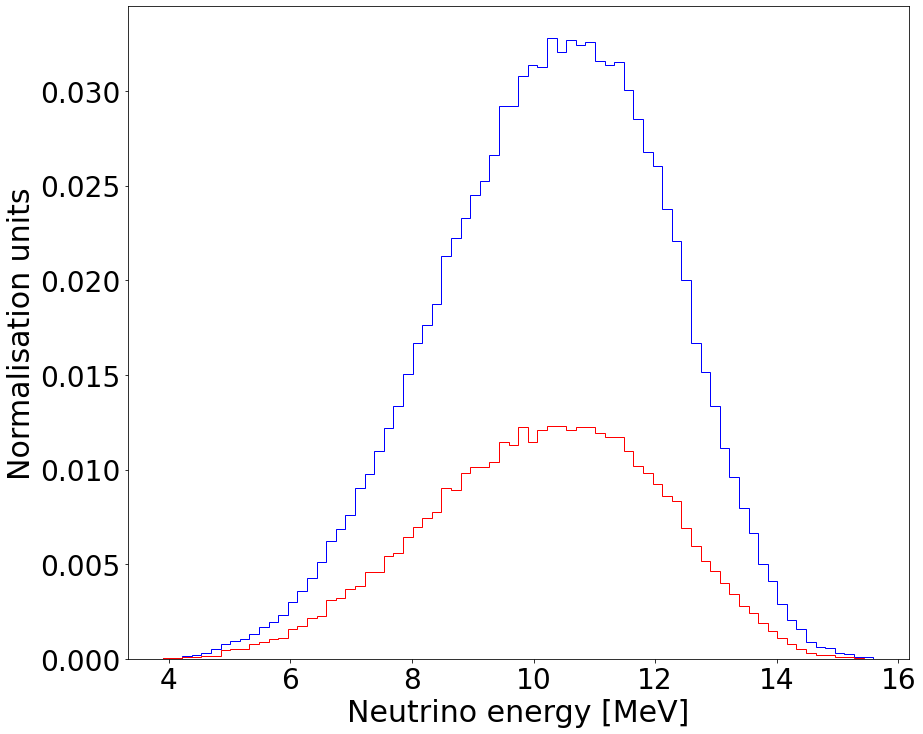

0.16605628329773622


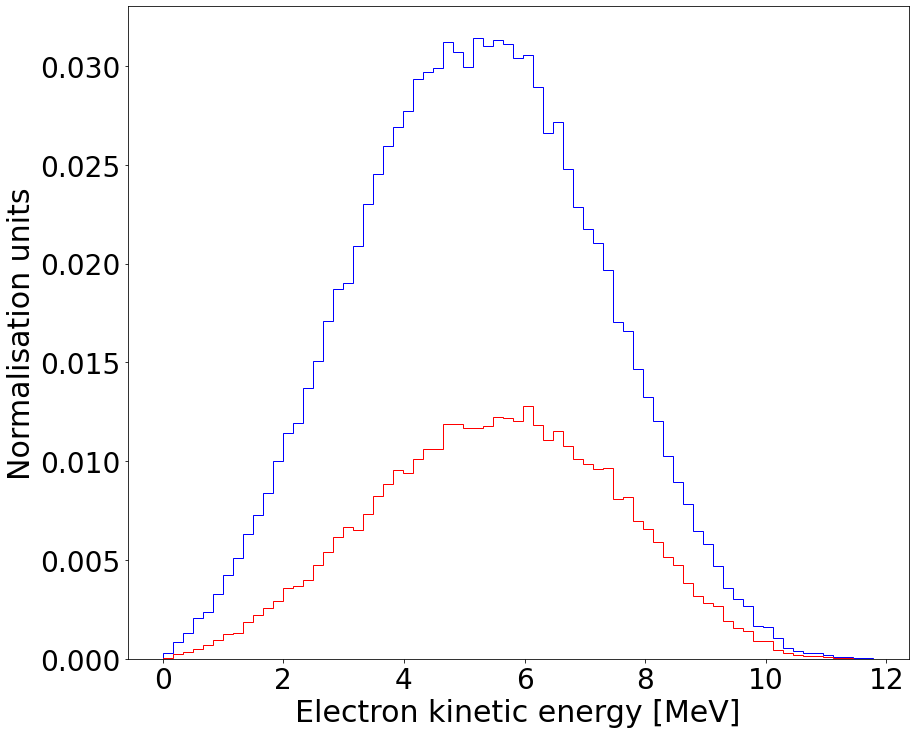

In [53]:

plt.figure(figsize=(14,12))

sen_frac = 0.38906

data = [Ev_output, Ev]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', color=['red','blue'], weights=hist_weights(rates,data), bins=num_bins, alpha=1)

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

################################

plt.figure(figsize=(14,12))

data = [KEl_output, KEl]
rates = [sen_frac, 1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['red','blue'], bins=num_bins, alpha=1)

plt.xlabel('Electron kinetic energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.15731959028229436


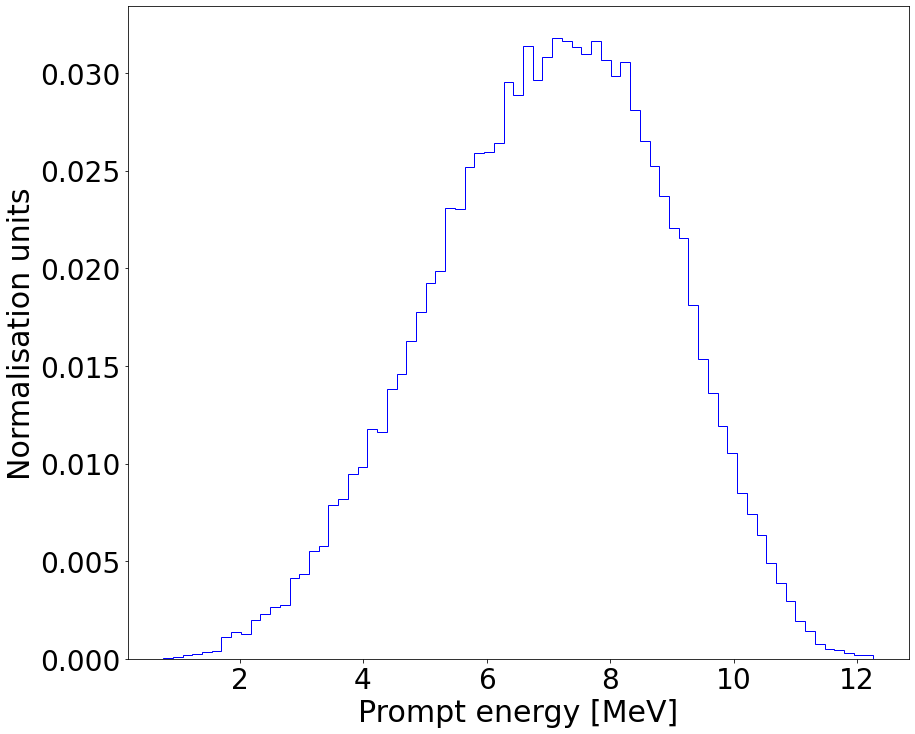

In [54]:
plt.figure(figsize=(14,12))

data = [prompt_output]
rates = [1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('Prompt energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

with open('8BCC_promptKE_night.txt', 'w') as f:
    
    for (a, b) in zip(bins[0:num_bins], n):
        
        f.write((str(a) + ' ' + str(b)))
        f.write('\n')

0.12871317896428747


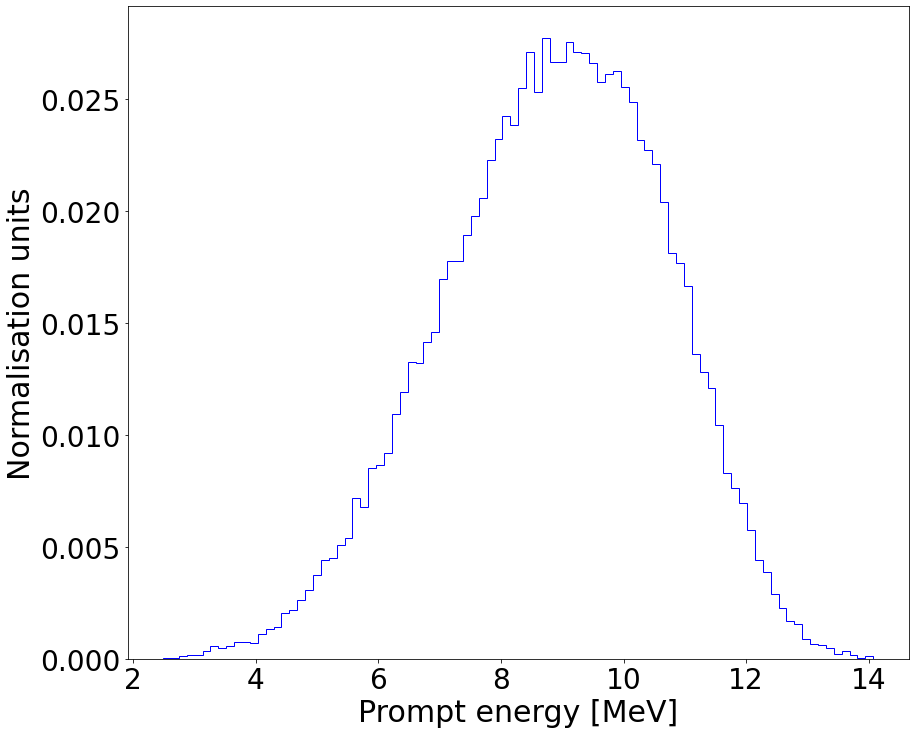

In [65]:
plt.figure(figsize=(14,12))

data = [prompt_output2]
rates = [1]

num_bins = optim_bins(data)
n, bins, patches = plt.hist(data, histtype='step', weights=hist_weights(rates,data), color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('Prompt energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

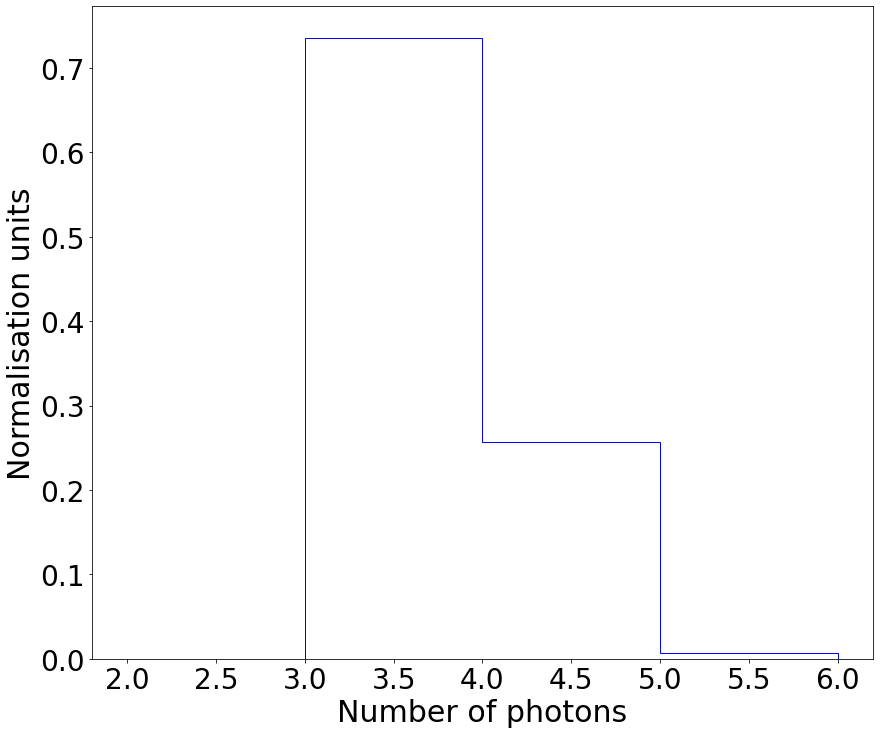

In [56]:
plt.figure(figsize=(14,12))

data = len_array

#num_bins = int((np.max(data) - np.min(data))/astropy.stats.freedman_bin_width(data, return_bins=False))

rate = 1
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', color='blue', weights=weight, bins=int(4/1), alpha=1, range=[2,6])

plt.xlabel('Number of photons',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

0.00805


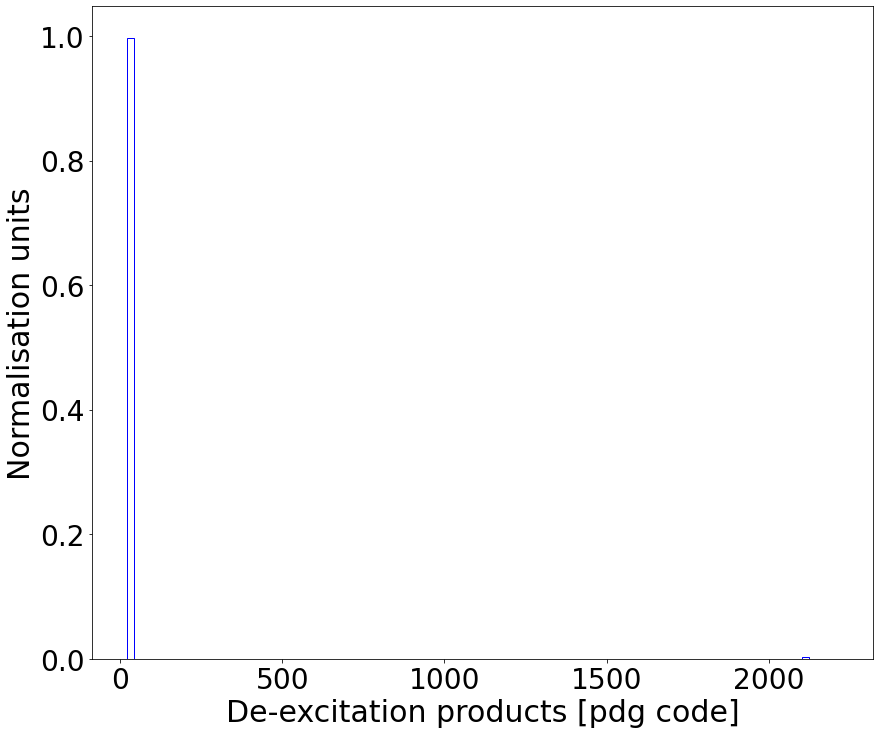

In [57]:
plt.figure(figsize=(14,12))


output = np.array([])
len_array = np.array([])
output2 = np.array([])
KEl_output = np.array([])
Ev_output = np.array([])
prompt_output = np.array([])
i = 0

data = pdgp

for array in data:
    for element in array: 
        if element > 22: 
            i += 1
print(i/len(data))
    
data = np.concatenate(pdgp)
rates = [1]

num_bins = 100
weight = (rate*np.ones_like(data))/len(data)

n, bins, patches = plt.hist(data, histtype='step', weights=weight, color=['blue'], bins=num_bins, alpha=1)

plt.xlabel('De-excitation products [pdg code]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

[ 0.99960798 -1.50237267]


Text(0, 0.5, 'Prompt Energy [MeV]')

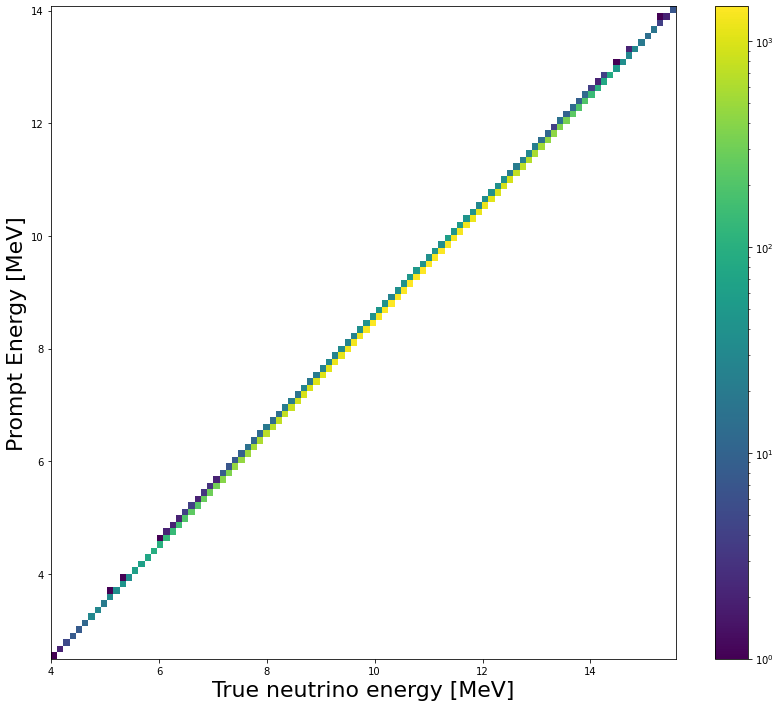

In [64]:
#Linear relation between neutrino and prompt energy

def f(x, A, B): 
    return A*x + B

plt.figure(figsize=(14,12))

KEl_total = np.array([])

for i in range(0, len(Ev_output2)):
    KEl_total = np.append(KEl_total, sum(KEl_output2[Ev_output2==Ev_output2[i]]))

fig = plt.hist2d(Ev_output2, prompt_output2, bins=(100,100), norm=colors.LogNorm())
popt, pcov = curve_fit(f, Ev_output2, prompt_output2)
print(popt)

plt.colorbar(fig[3])
    
plt.xlabel('True neutrino energy [MeV]',fontsize=22)
plt.ylabel('Prompt Energy [MeV]',fontsize=22)



In [59]:
len(Ev_output2)

60289